In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Top250.csv to Top250.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Top250.csv']))

In [4]:
df.head()

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger


In [5]:
df.isna().sum()

Rank                  0
Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

In [6]:
del df['Content']
del df['Headquarters']

In [7]:
df.dtypes

Rank                 int64
Restaurant          object
Sales                int64
YOY_Sales           object
Units                int64
YOY_Units           object
Segment_Category    object
dtype: object

In [8]:
df[['C1']]=df.Segment_Category.str.split('&',expand= False)

In [9]:
df.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,C1
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger,"[Quick Service , Burger]"
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe,"[Quick Service , Coffee Cafe]"
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken,"[Quick Service , Chicken]"
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican,"[Quick Service , Mexican]"
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger,"[Quick Service , Burger]"


In [10]:
#ax = sns.boxplot(x="C1", y="YOY_Sales", data=df)
df['YOY_Sales']=df['YOY_Sales'].astype(str)

In [11]:
df['YOY_Sales']=df['YOY_Sales'].apply(lambda x: x.strip('%'))

In [12]:
df.head()

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,C1
0,1,McDonald's,40412,4.9,13846,-0.5%,Quick Service & Burger,"[Quick Service , Burger]"
1,2,Starbucks,21380,8.6,15049,3.0%,Quick Service & Coffee Cafe,"[Quick Service , Coffee Cafe]"
2,3,Chick-fil-A,11320,13.0,2470,5.0%,Quick Service & Chicken,"[Quick Service , Chicken]"
3,4,Taco Bell,11293,9.0,6766,2.7%,Quick Service & Mexican,"[Quick Service , Mexican]"
4,5,Burger King,10204,2.7,7346,0.2%,Quick Service & Burger,"[Quick Service , Burger]"


In [13]:
df['YOY_Units']=df['YOY_Units'].astype(str)
df['YOY_Units']=df['YOY_Units'].apply(lambda x: x.strip('%'))

In [14]:

df['YOY_Units']=df['YOY_Units'].astype(float)
df['YOY_Sales']=df['YOY_Sales'].astype(float)


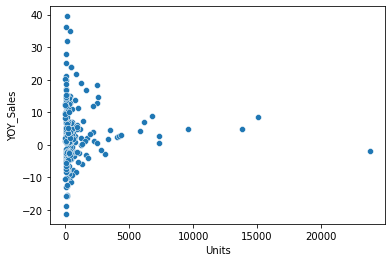

In [24]:
sns.scatterplot(data=df, y="YOY_Sales", x="Units")

YOY_sales% does not affect much on the number of units of the restaurant as the points come out to be a straight line.

In [25]:
df['Segment_Category'] = df['Segment_Category'].str.replace('Quick Service & ', '')
df['Segment_Category'] = df['Segment_Category'].str.replace('Fast Casual & ','')
df['Segment_Category'] = df['Segment_Category'].str.replace('Casual Dining & ','')
df['Segment_Category'] = df['Segment_Category'].str.replace('Fine Dining & ','')
df['Segment_Category'] = df['Segment_Category'].str.replace('Family Dining & Family Style','Varied Menu')
df['Segment_Category'] = df['Segment_Category'].str.replace('Family Casual','Varied Menu')
df['Segment_Category'] = df['Segment_Category'].str.replace('Family Style','Varied Menu')

Generally Family Dining places have variable menu thus changed the category

Looking out for only how Menu type affected the YOY_sales%

[Text(0, 0, 'Burger'),
 Text(0, 0, 'Coffee Cafe'),
 Text(0, 0, 'Chicken'),
 Text(0, 0, 'Mexican'),
 Text(0, 0, 'Sandwich'),
 Text(0, 0, 'Pizza'),
 Text(0, 0, 'Bakery Cafe'),
 Text(0, 0, 'Italian/Pizza'),
 Text(0, 0, 'Varied Menu'),
 Text(0, 0, 'Asian/Noodle'),
 Text(0, 0, 'Frozen Desserts'),
 Text(0, 0, 'Sports Bar'),
 Text(0, 0, 'Steak'),
 Text(0, 0, 'Seafood'),
 Text(0, 0, 'Asian'),
 Text(0, 0, 'Snack'),
 Text(0, 0, 'Beverage'),
 Text(0, 0, 'BBQ'),
 Text(0, 0, 'Healthy'),
 Text(0, 0, 'Ethnic')]

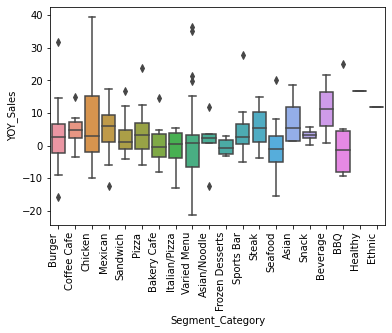

In [26]:
chart = sns.boxplot(x = 'Segment_Category', y = 'YOY_Sales', data = df) 
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

YOY_Sales% of Restaurants that offered chicken and varied cusine was too much variable while some are mostly in the positive category like restaurants selling Asian or Snack options 


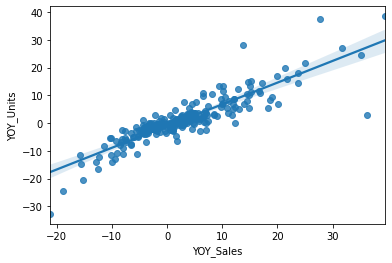

In [21]:
sns.regplot(data=df, x="YOY_Sales", y="YOY_Units")

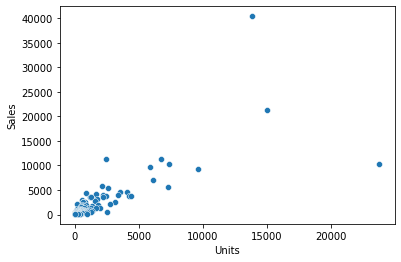

In [27]:
sns.scatterplot(data=df, y="Sales", x="Units")

percentage increase in sales positively affected the percentage increase in units year over year.